# **Proyecto de Fintech:**


***
***

### **Predicción de Fraude en Transacciones Financieras**
- **Descripción del Proyecto:**

Desarrollar un modelo predictivo para detectar
transacciones fraudulentas en una plataforma de pagos electrónicos, utilizando
técnicas de aprendizaje automático y análisis de comportamiento.

- **Fuente de Datos:**

El conjuntos de datos de transacciones financieras
fraudulentas se obtuvo a traves de repositorios de datos abiertos como el conjunto de datos de Fraude
de Tarjetas de Crédito en Kaggle.

Link: https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset


***

## **Diccionario:**

Descripcion de las columnas del DataFrame.

 1_ **trans_date_trans_time:** Timestamp of the transaction (date and time when the transaction occurred).
 2_ **cc_num:** Credit card number (hashed or anonymized).  
 3_ **merchant:** Merchant or store where the transaction occurred.
 4_ **category:** Type of transaction (e.g., grocery, entertainment).  
 5_ **amt:** Amount of the transaction.
 6_ **first:** First name of the cardholder.    
 7_ **last:** Last name of the cardholder.    
 8_ **gender:** Gender of the cardholder.     
 9_ **street:** Address details of the cardholder. 
 11_ **city:** City where the cardholder resides. 
 11_ **state:** State where the cardholder resides.  
 12_ **zip:** ZIP or postal code of the cardholder.  
 13_ **lat:** Latitude of the cardholder's address. 
 14_ **long:** Longitude of the cardholder's address.  
 15_ **city_pop:** Population of the cardholder's city.  
 16_ **job:** Job or occupation of the cardholder.  
 17_ **dob:** Date of birth of the cardholder.  
 18_ **trans_num:** Unique identifier for the transaction.  
 19_ **unix_time:** Transaction timestamp in Unix time (seconds since the Unix epoch, useful for time calculations).  
 20_ **merch_lat:** Latitude of the merchant’s location.  
 21_ **merch_long:** Longitude of the merchant’s location. 
 22_ **is_fraud:** Indicator of whether the transaction was fraudulent (1 for fraudulent, 0 for non-fraudulent).  
 23_ **merch_zipcode:** ZIP or postal code of the merchant. 

***

## **Importar Librerias**:

In [41]:
# Importa las librerías necesarias
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from dateutil.relativedelta import relativedelta

***

## **Carga de los Archivos**:

In [42]:
# Cargar el archivo .csv, especificando qué columnas incluir (todas menos 'Unnamed: 0') en un DataFrame
df = pd.read_csv('credit_card_transactions.csv', usecols=lambda column: column != 'Unnamed: 0')

***

## **Display de Celdas para Visualización**:

In [43]:
# Muestra todas las columnas
pd.set_option('display.max_columns', None)

# Muestra todas las filas
pd.set_option('display.max_rows', None) 

# Limita el ancho de cada columna a 50 caracteres
pd.set_option('display.max_colwidth', None)  

Se modifica el seteo para poder observar la totalidad de Columnas, Filas y Ancho de las Celdas.

***

## **Visualización General del DataFrame**:

In [44]:
#Tamaño del DataFrame
df_tamaño = df.size
print(f'El DataFrame posee un total de {df_tamaño} Celdas')

El DataFrame posee un total de 29823525 Celdas


In [45]:
#Forma, Columnas y FIlas
df_forma = df.shape
print(f'El DataFrame posee un Total de:\n\n-Columnas: {df_forma[1]} \n-Filas: {df_forma[0]}')

El DataFrame posee un Total de:

-Columnas: 23 
-Filas: 1296675


In [46]:
# Características generales del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

El DataFrame unicamente posee una sola columna con datos nulos, la columna'merch_zipcode'.

In [47]:
# Verifica los primeros registros
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


***

## **Datos Ausentes:**

In [49]:
# Suma los ausentes de cada columna
datos_faltantes = df.isna().sum()

# Calcula el total de los nulos
total_faltantes = datos_faltantes.sum()

# Porcentaje Total de los faltantes
porcentaje_faltantes = round((total_faltantes / df_tamaño) * 100, 2)

# Impresión en pantalla de los resultados
print(f'Faltantes por Columnas:\n{datos_faltantes}\n')
print('---------------------------------------')
print(f'Faltantes totales: {total_faltantes}')
print(f'Porcentaje Total de Faltantes: {porcentaje_faltantes}%')


Faltantes por Columnas:
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

---------------------------------------
Faltantes totales: 195973
Porcentaje Total de Faltantes: 0.66%


***

## **Datos Duplicados:**

In [50]:
# Crea variable con numero de duplicados
cantidad_duplicados = df.duplicated().sum()
print(f'La cantidad de Filas Duplicadas es: {cantidad_duplicados}')

La cantidad de Filas Duplicadas es: 0


***

## **Variables:**

- Observamos el tipo de Variables que posee el Dataframe, para decidir si es necesario realizar un cambio de tipo que facilite su tratamiento en su posterior análisis.

In [51]:
# Tipo de Dato de cada Columna
variables = df.dtypes
print(f'Tipo de dato de cada Variable:\n{variables}')

Tipo de dato de cada Variable:
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object


In [52]:
# Variable con los tipos de datos únicos
tipo_variable = set(df.dtypes)
print(f'Tipo de variables unicas:\n{tipo_variable}')

Tipo de variables unicas:
{dtype('int64'), dtype('O'), dtype('float64')}


In [53]:
# Columnas según tipo de variable 'object'
columnas_object = df.select_dtypes(include=['object']).columns
print(f'Variables tipo Object:\n{columnas_object}\n')

# Columnas según tipo de variable 'int64'
columnas_int64 = df.select_dtypes(include=['int64']).columns
print(f'Variables tipo Object:\n{columnas_int64}\n')

# Columnas según tipo de variable 'float64'
columnas_float64 = df.select_dtypes(include=['float64']).columns
print(f'Variables tipo Float:\n{columnas_float64}')

Variables tipo Object:
Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

Variables tipo Object:
Index(['cc_num', 'zip', 'city_pop', 'unix_time', 'is_fraud'], dtype='object')

Variables tipo Float:
Index(['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'merch_zipcode'], dtype='object')


### **Modificar Columnas:**

In [54]:
# Convertir la columna 'trans_date_trans_time' a formato datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Verificar el tipo de dato modificado
print(f"Tipo de dato modificado, columna 'trans_date_trans_time': {df['trans_date_trans_time'].dtype}")

# Convertir 'dob' a formato datetime 
df['dob'] = pd.to_datetime(df['dob'])

# Verificar el tipo de dato modificado
print(f"Tipo de dato modificado, columna 'dob': {df['dob'].dtype}")



Tipo de dato modificado, columna 'trans_date_trans_time': datetime64[ns]
Tipo de dato modificado, columna 'dob': datetime64[ns]


In [55]:
# Crear una función para calcular la edad con relativedelta
def calcular_edad(fecha_nacimiento):
    """
    Calcular la edad de una persona en años a partir de su fecha de nacimiento.

    Args:
        fecha_nacimiento (datetime): La fecha de nacimiento de la persona.

    Returns:
        int: La edad de la persona en años.
    """
    
    # Obtener la fecha actual en formato datetime
    fecha_actual = pd.to_datetime('today')
    
    # Calcular la diferencia entre la fecha actual y la fecha de nacimiento
    # y retornar solo la cantidad de años.
    return relativedelta(fecha_actual, fecha_nacimiento).years


# Aplicar la función a la columna 'dob' para crear una nueva columna 'edad'
df['edad'] = df['dob'].apply(calcular_edad)

# Muestra la Columna creada
print(f"Columna edad creada:\n{df['edad'].head(10)}")


Columna edad creada:
0    36
1    46
2    62
3    57
4    38
5    63
6    31
7    77
8    83
9    50
Name: edad, dtype: int64


In [15]:
# Función para generar una columna con rango etario
def rango_etario(edad):
    """
    Determina el rango etario de una persona basado en su edad.

    Args:
        edad (int): La edad de la persona.

    Returns:
        str: Una cadena que describe el rango etario de la persona.
              Los posibles valores son:
              - 'Menores a 25 Años'
              - 'Entre 25 y 40 Años'
              - 'Entre 40 y 55 Años'
              - 'Entre 55 y 70 Años'
              - 'Mayores a 70 Años'

    Raises:
        ValueError: Si la edad es negativa o no es un número entero.
    """
    
    # Valida que la edad es un número entero no negativo
    if not isinstance(edad, int) or edad < 0:
        raise ValueError("La edad debe ser un número entero no negativo.")
    
    # Define una lista de tuplas que contiene los rangos de edad y sus etiquetas correspondientes.
    rangos = [
        (0, 25, 'Menores a 25 Años'),       # Rango: 0 a 25 años
        (25, 40, 'Entre 25 y 40 Años'),     # Rango: 25 a 40 años
        (40, 55, 'Entre 40 y 55 Años'),     # Rango: 40 a 55 años
        (55, 70, 'Entre 55 y 70 Años'),     # Rango: 55 a 70 años
        (70, float('inf'), 'Mayores a 70 Años')  # Rango: 70 años en adelante (sin límite superior)
    ]
    
    # Itera sobre cada rango en la lista de rangos.
    for limite_inferior, limite_superior, etiqueta in rangos:
        # Verifica si la edad está dentro del rango actual.
        if limite_inferior <= edad < limite_superior:
            # Si la edad está dentro del rango, devuelve la etiqueta correspondiente.
            return etiqueta
        

# Crea una nueva columna aplicando la funcion a la variable 'edad'
df['rango_etario'] = df['edad'].apply(rango_etario)
        
# Seleccionar las columnas 'edad' y 'rango_etareo'
print(f"Visualizacion de Columnas: \n{df[['edad', 'rango_etario']].head(5)}")


Visualizacion de Columnas: 
   edad        rango_etario
0    36  Entre 25 y 40 Años
1    46  Entre 40 y 55 Años
2    62  Entre 55 y 70 Años
3    57  Entre 55 y 70 Años
4    38  Entre 25 y 40 Años


In [16]:
# Convertir la columna 'merch_zipcode' al tipo Int64
df['merch_zipcode'] = df['merch_zipcode'].astype('Int64')

# Verificar el tipo de dato de la columna después de la conversión
print(f"Tipo de Dato Modificado: {df['merch_zipcode'].dtype}")

Tipo de Dato Modificado: Int64


Se puede observar que la variable 'trans_date_trans_time' y 'dob' son de tipo 'object' y tienen valores de fecha,  la variable 'merch_zipcode' posee tipo 'float64' al ser código postal deberían ser números enteros.

Por estas situaciones, se decide hacer un cambio de tipo al correspondiente.

In [17]:
# Cambia de nombre de variables a Español
df = df.rename(columns={
    'trans_date_trans_time': 'fecha_hora_transaccion',
    'cc_num': 'numero_tarjeta',
    'merchant': 'comercio',
    'category': 'categoria',
    'amt': 'monto',
    'first': 'nombre',
    'last': 'apellido',
    'gender': 'genero',
    'street': 'calle',
    'city': 'ciudad',
    'state': 'estado',
    'zip': 'codigo_postal',
    'lat': 'latitud',
    'long': 'longitud',
    'city_pop': 'poblacion_ciudad',
    'job': 'trabajo',
    'dob': 'fecha_nacimiento',
    'trans_num': 'numero_transaccion',
    'unix_time': 'tiempo_unix',
    'merch_lat': 'latitud_comercio',
    'merch_long': 'longitud_comercio',
    'is_fraud': 'es_fraude',
    'merch_zipcode': 'codigo_postal_comercio'
})


***

## **Variables Individuales:**

Agrupamos  las variables según su tipo para un análisis individual.

In [25]:
# Columnas según tipo de variable 'object'
columnas_cualitativa = df.select_dtypes(include=['object']).columns
print(f'Variables tipo Cualitativa:\n{columnas_cualitativa}\n')

# Columnas según tipo de variable 'int64'
columnas_cuantitativa = df.select_dtypes(include=['int64', 'float64']).columns
print(f'Variables tipo Cuantitativa:\n{columnas_cuantitativa}\n')

# Columnas según tipo de variable 'datetime64'
columnas_tiempo = df.select_dtypes(include=['datetime64']).columns
print(f'Variables tipo Tiempo:\n{columnas_tiempo}')

Variables tipo Cualitativa:
Index(['comercio', 'categoria', 'nombre', 'apellido', 'genero', 'calle',
       'ciudad', 'estado', 'trabajo', 'numero_transaccion', 'rango_etario'],
      dtype='object')

Variables tipo Cuantitativa:
Index(['numero_tarjeta', 'monto', 'codigo_postal', 'latitud', 'longitud',
       'poblacion_ciudad', 'tiempo_unix', 'latitud_comercio',
       'longitud_comercio', 'es_fraude', 'codigo_postal_comercio', 'edad'],
      dtype='object')

Variables tipo Tiempo:
Index(['fecha_hora_transaccion', 'fecha_nacimiento'], dtype='object')


### **Categoricas:**

**Comercio:**

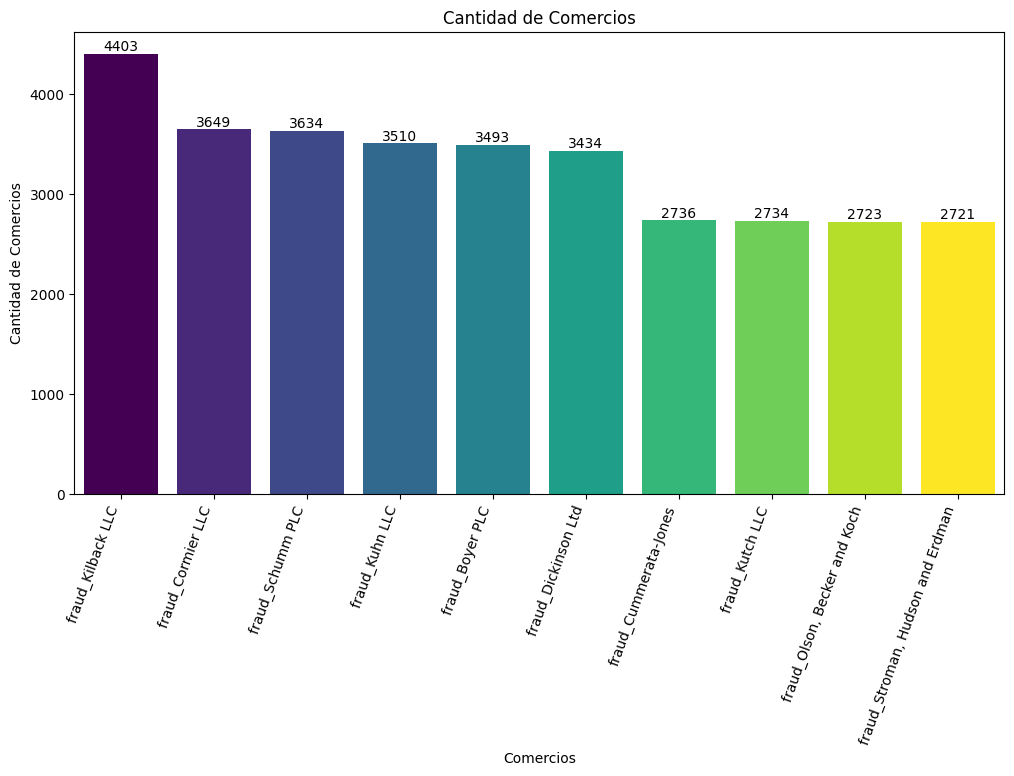

In [79]:
# Calcular los conteos
comercio_counts = df['comercio'].value_counts().head(10)

# Convertir a DataFrame para poder usarlo en seaborn
comercio_df = comercio_counts.reset_index()

# Renombrar las columnas para mayor claridad
comercio_df.columns = ['comercio', 'conteo']

# Crea una nueva figura con un tamaño personalizado
plt.figure(figsize=(12, 6))  

# Crea el gráfico de barras con seaborn
ax = sns.barplot(x='comercio', y='conteo', data=comercio_df)  

# Título y etiquetas de los ejes
ax.set_title('Cantidad de Comercios')  

# Etiqueta el eje X como "Comercios".
ax.set_xlabel('Comercios')  

# Etiqueta el eje Y como "Cantidad de Comercios".
ax.set_ylabel('Cantidad de Comercios')  

# Cambiar los colores de las barras manualmente usando matplotlib
colors = plt.cm.viridis(np.linspace(0, 1, len(comercio_df)))  

# Asignar un color a cada barra
for bar, color in zip(ax.patches, colors):  
    bar.set_facecolor(color)  

# Rotar las etiquetas del eje X
plt.xticks(rotation=70, ha='right')  

# Añadir etiquetas a las barras
for i in ax.containers:  
    ax.bar_label(i)  

# Mostrar el gráfico
plt.show()  

**Categoria:**

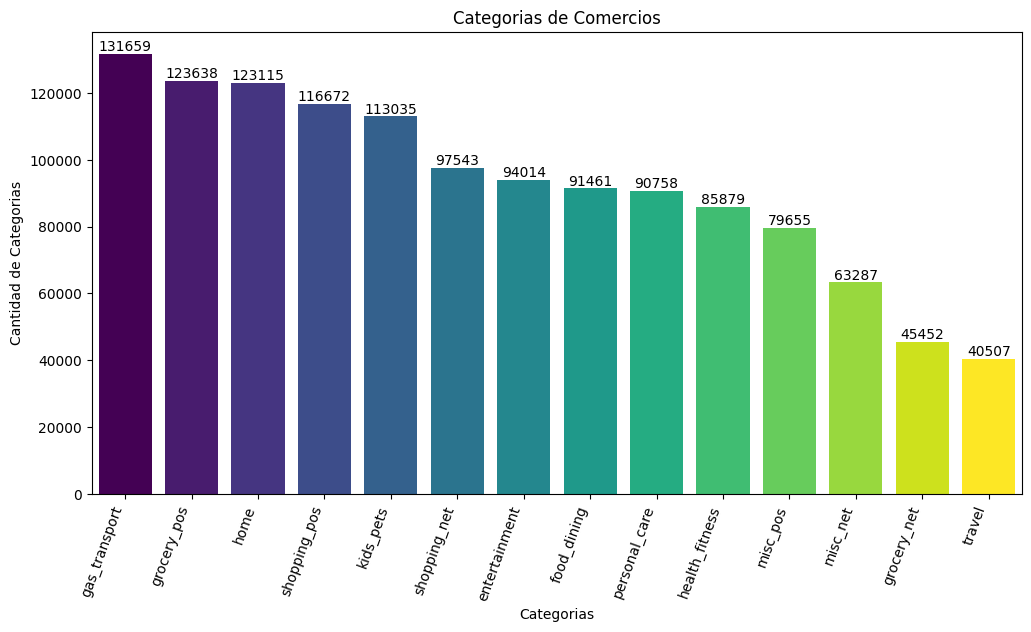

In [94]:
# Calcular los conteos
categoria_counts = df['categoria'].value_counts().head(15)

# Convertir a DataFrame para poder usarlo en seaborn
categoria_df = categoria_counts.reset_index()

# Renombrar las columnas para mayor claridad
categoria_df.columns = ['categoria', 'conteo']

# Crea las medidas de la figura
plt.figure(figsize=(12,6))

# Crear el gráfico de barras con seaborn
ax = sns.barplot(x='categoria', y='conteo', data=categoria_df)

# Título y etiquetas de los ejes
ax.set_title('Categorias de Comercios')
ax.set_xlabel('Categorias')
ax.set_ylabel('Cantidad de Categorias')

# Cambiar los colores de las barras manualmente usando matplotlib
colors = plt.cm.viridis(np.linspace(0,1, len(categoria_df)))

# Asignar un color a cada barra
for bar,color in zip(ax.patches, colors):
    bar.set_facecolor(color)

# Rotar las etiquetas del eje X
plt.xticks(rotation=70, ha='right')

# Cambiar los colores de las barras manualmente usando matplotlib
for i in ax.containers:
    ax.bar_label(i)

# Muestra el gráfico
plt.show()

In [96]:
# Las 5 categorías mas destacadas
categoria_df.head()

,categoria,conteo
0,gas_transport,131659
1,grocery_pos,123638
2,home,123115
3,shopping_pos,116672
4,kids_pets,113035


Esta celda esperar hasta el analisis de tiempo

In [ ]:
# Calcula la fecha minima
fecha_minima = df['fecha_hora_transaccion'].min()

# Calcula la fecha Maxima
fecha_maxima = df['fecha_hora_transaccion'].max()

# Calcula cantidad de días entre los fechas max y min
periodo_transacciones = abs(fecha_minima - fecha_maxima)

# Calcula el tiempo aproximado en días
periodo_transacciones_año = periodo_transacciones.days / 365

# Imprime por pantalla los resultados
print(f'La fecha minima es: {fecha_minina}')
print(f'La fecha maxima es: {fecha_maxima}')
print(f'Cantidad de dias: {periodo_transacciones}')
print(f'El periodo de transacciones analizadas es aproximado: {round(periodo_transacciones_año, 2)} años')

***
***

## **Fraude vs No Fraude:**

In [36]:
df_fraude_conteo = df['es_fraude'].value_counts()
df_fraude_no_fraude = df_fraude_conteo.reset_index()
df_fraude_no_fraude.columns = ['Fraude', 'Conteo']
df_fraude_no_fraude.head()

,Fraude,Conteo
0,0,1289169
1,1,7506


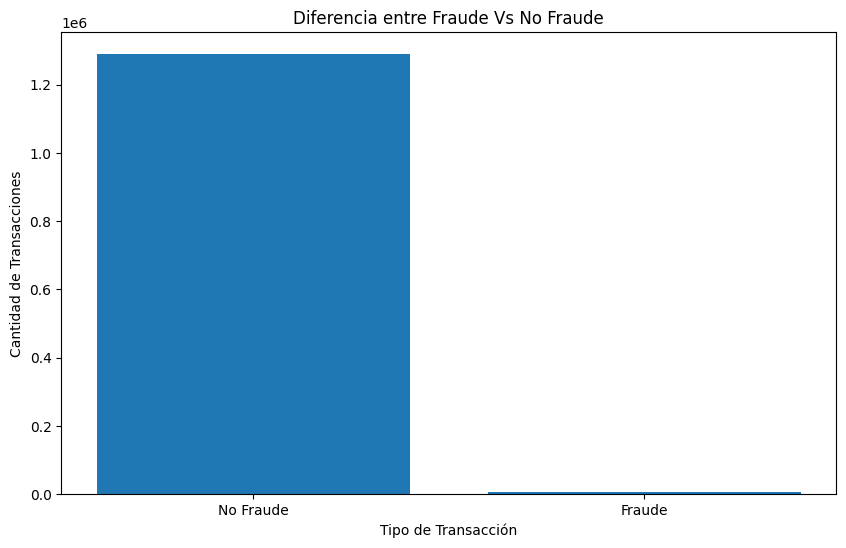

In [40]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10,6))

# Crear gráfico de barras
plt.bar(df_fraude_no_fraude['Fraude'], df_fraude_no_fraude['Conteo'])
plt.xticks(ticks=[0, 1], labels=['No Fraude', 'Fraude'])
# Personalización del gráfico
plt.title('Diferencia entre Fraude Vs No Fraude')
plt.xlabel('Tipo de Transacción')
plt.ylabel('Cantidad de Transacciones')

# Mostrar el gráfico
plt.show()

In [34]:
df_fraude_no_fraude.columns

Index(['es_fraude', 'count'], dtype='object')

In [19]:
df_fraude = df[df['es_fraude'] == 1]

In [20]:
df_no_fraude = df[df['es_fraude'] == 0]